In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
animes = pd.read_csv('../myanimelist-data-set-creator/AnimeDatasetGeneratorScript/AnimeList.csv')
animelists = pd.read_csv('../myanimelist-data-set-creator/UserDatasetGeneratorScripts/UserAnimeList2.csv')
users = pd.read_csv('../myanimelist-data-set-creator/UserDatasetGeneratorScripts/UserList2.csv')

In [78]:
users[['gender', 'location', 'birth_date']] = users[['gender', 'location', 'birth_date']].fillna('')  # just weird fillna
users.loc[4]['gender']

''

In [4]:
animes.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [5]:
animes.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

In [6]:
animelists.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,1362923691,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,1367081015,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,1362308037,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,1364399953,NaN


In [7]:
users.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,,,,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0


In [8]:
## showing stats
print('unique animes:', len(animes))
print('unique users:', len(users))
print('total list records:', len(animelists))
print('total ratings:', (animelists['my_score'] != 0).sum())
print('users with gender:', (users['gender'] != '').sum())
filled_mask = (users['gender'] != '') & (users['location'] != '') & (users['birth_date'] != '')
print('users with data:', (filled_mask).sum())
print('users without data:', (~filled_mask).sum())

unique animes: 14478
unique users: 302675
total list records: 80076112
total ratings: 46358322
users with gender: 217800
users with data: 119632
users without data: 183043


In [9]:
joined = pd.merge(animelists, users[['username', 'gender', 'location', 'birth_date']], on='username', how='inner')
joined = pd.merge(joined, animes[['anime_id', 'genre']], on='anime_id', how='inner')
joined.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,gender,location,birth_date,genre
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN,Female,"Chennai, India",1990-04-29,"Action, Adventure, Comedy, Super Power, Drama,..."
1,RedvelvetDaisuki,21,0,0000-00-00,0000-00-00,0,3,0.0,0,1355480701,NaN,Female,Manila,1995-01-01,"Action, Adventure, Comedy, Super Power, Drama,..."
2,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,1254296345,NaN,Male,"Detroit,Michigan",1991-08-01,"Action, Adventure, Comedy, Super Power, Drama,..."
3,bskai,21,75,0000-00-00,0000-00-00,8,1,0.0,0,1276637483,NaN,Male,"Nayarit, Mexico",1990-12-14,"Action, Adventure, Comedy, Super Power, Drama,..."
4,shuzzable,21,579,0000-00-00,0000-00-00,10,1,0.0,0,1391921419,NaN,,,,"Action, Adventure, Comedy, Super Power, Drama,..."


In [10]:
# getting known and unknown usernames
filled_list_mask = (joined['gender'] != '') & (joined['location'] != '') & (joined['birth_date'] != '')
not_filled_list_mask = ~filled_list_mask

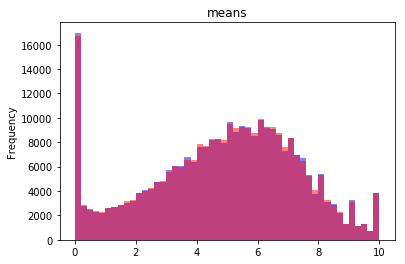

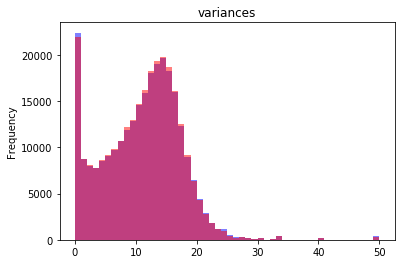

In [17]:
# showing stats per filled and unfilled users, specifically ratings means, ratings variances and genres rated and genres total in lists
# total rating mean per user hist

#animelists.groupby('username')['my_score'].mean().plot(kind='hist', bins=50, title='all mean')
animelists[filled_list_mask].groupby('username')['my_score'].mean().plot(kind='hist', bins=50, color='blue', alpha=0.5, title='means')
animelists[not_filled_list_mask].groupby('username')['my_score'].mean().plot(kind='hist', bins=50, color='red', alpha=0.5)
plt.show()
#animelists.groupby('username')['my_score'].var().plot(kind='hist', bins=50, title='all var')
animelists[filled_list_mask].groupby('username')['my_score'].var().plot(kind='hist', bins=50, color='blue', alpha=0.5, title='variances')
animelists[not_filled_list_mask].groupby('username')['my_score'].var().plot(kind='hist', bins=50, color='red', alpha=0.5)
plt.show()


In [12]:
joined['genre'].fillna('', inplace=True)

In [13]:
filled_genres = joined[filled_list_mask]['genre'].apply(lambda x: x.replace(' ', '').split(','))
not_filled_genres = joined[not_filled_list_mask]['genre'].apply(lambda x: x.replace(' ', '').split(','))


In [14]:
filled_genres_hist = pd.Series([y for x in filled_genres for y in x]).value_counts()
not_filled_genres_hist = pd.Series([y for x in not_filled_genres for y in x]).value_counts()

In [31]:
norm_filled_genres_hist = filled_genres_hist / filled_genres_hist.sum()
norm_not_filled_genres_hist = not_filled_genres_hist / not_filled_genres_hist.sum()

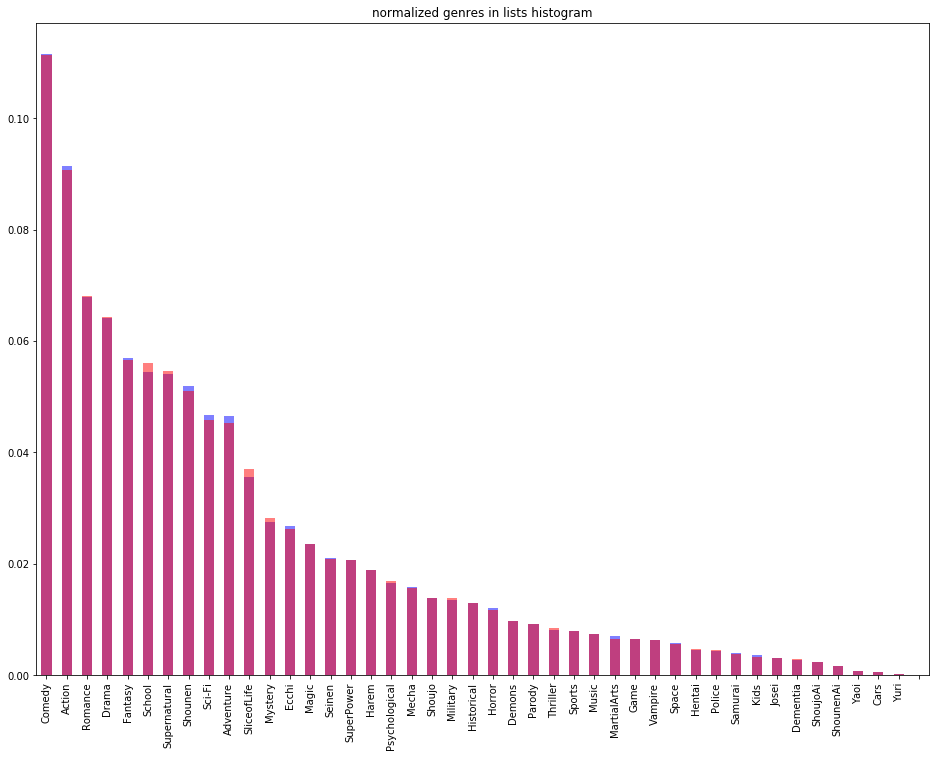

In [33]:
plt.figure(figsize=(16, 12))
norm_filled_genres_hist.plot(kind='bar', color='blue', alpha=0.5, title='normalized genres in lists histogram')
norm_not_filled_genres_hist.plot(kind='bar', color='red', alpha=0.5)
plt.show()


In [35]:
filled_rated_genres = joined[filled_list_mask & (joined['my_score'] != 0)]['genre'].apply(lambda x: x.replace(' ', '').split(','))
not_filled_rated_genres = joined[not_filled_list_mask & (joined['my_score'] != 0)]['genre'].apply(lambda x: x.replace(' ', '').split(','))
filled_rated_genres_hist = pd.Series([y for x in filled_rated_genres for y in x]).value_counts()
not_filled_rated_genres_hist = pd.Series([y for x in not_filled_rated_genres for y in x]).value_counts()


In [41]:
norm_filled_rated_genres_hist = filled_rated_genres_hist / filled_rated_genres_hist.sum()
norm_not_filled_rated_genres_hist = not_filled_rated_genres_hist / not_filled_rated_genres_hist.sum()

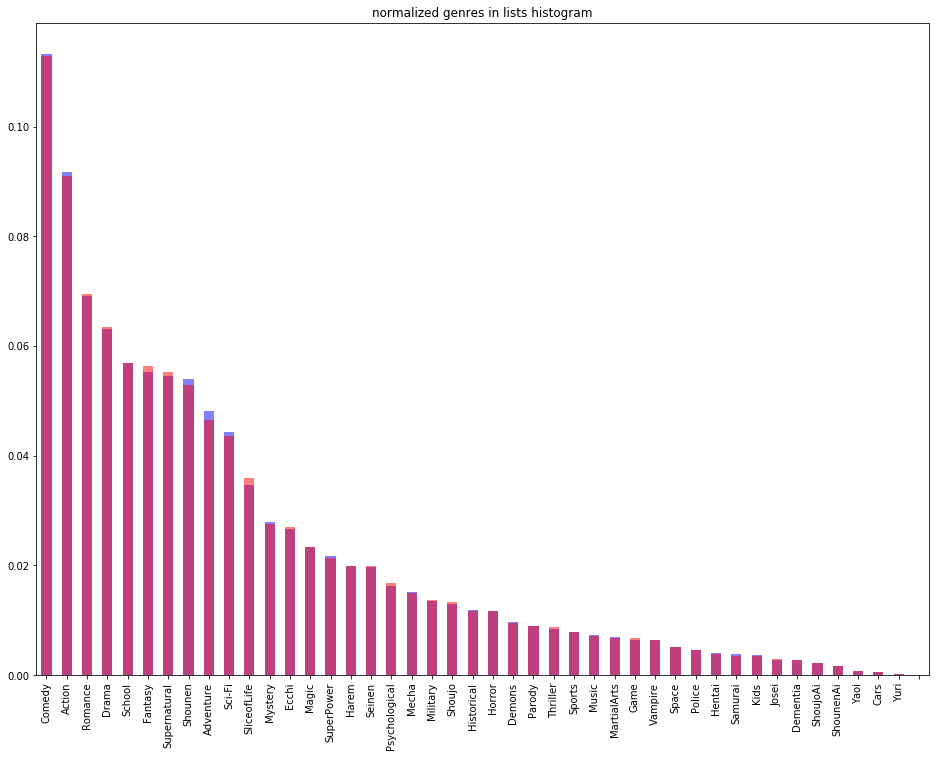

In [42]:
plt.figure(figsize=(16, 12))
norm_filled_rated_genres_hist.plot(kind='bar', color='blue', alpha=0.5, title='normalized genres in lists histogram')
norm_not_filled_rated_genres_hist.plot(kind='bar', color='red', alpha=0.5)
plt.show()


In [43]:
# unique animes for filled users and non filled users
print('anime count filled:', len(joined[filled_list_mask]['anime_id'].unique()))
print('anime count not filled:', len(joined[not_filled_list_mask]['anime_id'].unique()))
print('anime all:', len(joined['anime_id'].unique()))


anime count filled: 14474
anime count not filled: 14475
anime all: 14478


In [86]:
## saving only people with demograhic data and their data into new csv files
animes[animes['anime_id'].isin(joined[filled_list_mask]['anime_id'].unique())].to_csv('anime_filtered.csv', index=False, sep=',', encoding='utf-8')
users[users['username'].isin(joined[filled_list_mask]['username'].unique())].to_csv('users_filtered.csv', index=False, sep=',', encoding='utf-8')

In [92]:
joined[filled_list_mask][['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags']].to_csv('animelists_filtered.csv', index=False, sep=',', encoding='utf-8')

In [2]:
# check loading filtered data
anime_filtered = pd.read_csv('anime_filtered.csv')
users_filtered = pd.read_csv('users_filtered.csv')
animelists_filtered = pd.read_csv('animelists_filtered.csv')

In [68]:
animes.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,14478.000000,14478.000000,14478.000000,1.447800e+04,12904.000000,14478.000000,1.447800e+04,14478.000000
mean,17377.229866,11.308399,6.142482,1.146003e+04,6439.065406,7220.259566,2.296640e+04,311.649606
std,13165.315011,43.443451,1.463981,4.310519e+04,3720.227608,4170.080564,7.498136e+04,2615.554211
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,4389.250000,1.000000,5.550000,4.600000e+01,3216.250000,3611.500000,2.450000e+02,0.000000
50%,15135.000000,1.000000,6.370000,5.010000e+02,6441.500000,7225.500000,1.679500e+03,2.000000
75%,31146.500000,12.000000,7.060000,3.941500e+03,9664.000000,10827.750000,1.037900e+04,23.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14487.000000,1.456378e+06,106895.000000


In [69]:
animes[animes['anime_id'].isin(joined[filled_list_mask]['anime_id'].unique())].describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,14474.000000,14474.000000,14474.000000,1.447400e+04,12901.000000,14474.000000,1.447400e+04,14474.000000
mean,17371.948183,11.310971,6.144179,1.146319e+04,6439.625068,7220.277256,2.297275e+04,311.735595
std,13163.266015,43.449161,1.460617,4.311072e+04,3719.462602,4168.959000,7.499075e+04,2615.910510
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,4387.500000,1.000000,5.550000,4.600000e+01,3218.000000,3613.250000,2.450000e+02,0.000000
50%,15128.000000,1.000000,6.370000,5.010000e+02,6442.000000,7225.500000,1.682500e+03,2.000000
75%,31142.000000,12.000000,7.060000,3.947250e+03,9664.000000,10826.750000,1.038050e+04,23.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14487.000000,1.456378e+06,106895.000000


In [70]:
anime_filtered.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,14474.000000,14474.000000,14474.000000,1.447400e+04,12901.000000,14474.000000,1.447400e+04,14474.000000
mean,17371.948183,11.310971,6.144179,1.146319e+04,6439.625068,7220.277256,2.297275e+04,311.735595
std,13163.266015,43.449161,1.460617,4.311072e+04,3719.462602,4168.959000,7.499075e+04,2615.910510
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,4387.500000,1.000000,5.550000,4.600000e+01,3218.000000,3613.250000,2.450000e+02,0.000000
50%,15128.000000,1.000000,6.370000,5.010000e+02,6442.000000,7225.500000,1.682500e+03,2.000000
75%,31142.000000,12.000000,7.060000,3.947250e+03,9664.000000,10826.750000,1.038050e+04,23.000000
max,37916.000000,1818.000000,10.000000,1.009477e+06,12919.000000,14487.000000,1.456378e+06,106895.000000


In [79]:
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes
count,3.026750e+05,302675.000000,302675.000000,302675.000000,302675.000000,302675.000000,3.026750e+05,0.0,302546.000000,302546.000000,3.025460e+05
mean,2.061401e+06,13.400007,166.638289,9.861796,10.550366,64.040430,6.907645e+01,NaN,7.120476,10.375460,4.846288e+03
std,2.118037e+06,34.747045,239.359931,34.270394,43.119854,157.485891,4.741020e+03,NaN,2.574451,44.239666,4.473811e+05
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00
25%,2.322455e+05,2.000000,28.000000,0.000000,0.000000,2.000000,1.363000e+01,NaN,7.090000,0.000000,8.160000e+02
50%,1.167583e+06,6.000000,96.000000,2.000000,2.000000,20.000000,3.958000e+01,NaN,7.800000,0.000000,2.384000e+03
75%,3.883446e+06,14.000000,217.000000,10.000000,10.000000,68.000000,7.994000e+01,NaN,8.440000,6.000000,4.849000e+03
max,7.273306e+06,6370.000000,11536.000000,9729.000000,10823.000000,12051.000000,2.601351e+06,NaN,10.000000,9404.000000,2.437949e+08


In [94]:
users[users['username'].isin(joined[filled_list_mask]['username'].unique())].describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes
count,1.161330e+05,116133.000000,116133.000000,116133.000000,116133.000000,116133.000000,1.161330e+05,0.0,116133.000000,116133.000000,1.161330e+05
mean,1.810832e+06,14.610283,195.498807,11.338018,11.818518,74.936332,9.329691e+01,NaN,7.713389,13.991079,6.611762e+03
std,1.996139e+06,32.459424,256.533148,31.622640,31.117077,177.889249,7.636053e+03,NaN,1.538595,54.731186,7.155270e+05
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00
25%,1.990980e+05,3.000000,47.000000,0.000000,0.000000,5.000000,2.246000e+01,NaN,7.310000,0.000000,1.349000e+03
50%,5.615770e+05,7.000000,121.000000,4.000000,3.000000,27.000000,4.990000e+01,NaN,7.880000,1.000000,3.017000e+03
75%,3.464591e+06,16.000000,253.000000,12.000000,12.000000,80.000000,9.277000e+01,NaN,8.460000,10.000000,5.642000e+03
max,7.251737e+06,2934.000000,11536.000000,2562.000000,2457.000000,12051.000000,2.601351e+06,NaN,10.000000,9404.000000,2.437949e+08


In [95]:
users_filtered.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes
count,1.161330e+05,116133.000000,116133.000000,116133.000000,116133.000000,116133.000000,1.161330e+05,0.0,116133.000000,116133.000000,1.161330e+05
mean,1.810832e+06,14.610283,195.498807,11.338018,11.818518,74.936332,9.329691e+01,NaN,7.713389,13.991079,6.611762e+03
std,1.996139e+06,32.459424,256.533148,31.622640,31.117077,177.889249,7.636053e+03,NaN,1.538595,54.731186,7.155270e+05
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00
25%,1.990980e+05,3.000000,47.000000,0.000000,0.000000,5.000000,2.246000e+01,NaN,7.310000,0.000000,1.349000e+03
50%,5.615770e+05,7.000000,121.000000,4.000000,3.000000,27.000000,4.990000e+01,NaN,7.880000,1.000000,3.017000e+03
75%,3.464591e+06,16.000000,253.000000,12.000000,12.000000,80.000000,9.277000e+01,NaN,8.460000,10.000000,5.642000e+03
max,7.251737e+06,2934.000000,11536.000000,2562.000000,2457.000000,12051.000000,2.601351e+06,NaN,10.000000,9404.000000,2.437949e+08


In [106]:
animelists.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated
count,8.007611e+07,8.007611e+07,8.007611e+07,8.007611e+07,6.333426e+07,8.007611e+07,8.007611e+07
mean,1.196189e+04,1.396328e+01,4.338410e+00,3.035068e+00,7.239367e-04,7.406522e+00,1.383827e+09
std,1.143202e+04,3.391269e+02,3.933398e+00,1.746709e+00,2.689633e-02,1.110973e+04,1.401150e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.762000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.323886e+09
50%,8.476000e+03,3.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.404043e+09
75%,2.047900e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.467512e+09
max,3.791600e+04,6.553500e+04,1.000000e+01,5.500000e+01,1.000000e+00,1.677722e+07,1.526976e+09


In [111]:
joined[filled_list_mask].describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated
count,3.580201e+07,3.580201e+07,3.580201e+07,3.580201e+07,2.803259e+07,3.580201e+07,3.580201e+07
mean,1.169585e+04,1.571154e+01,4.538479e+00,3.038820e+00,7.662510e-04,1.604731e-01,1.378708e+09
std,1.137968e+04,4.755021e+02,3.915358e+00,1.746312e+00,2.767063e-02,9.433500e+02,1.381206e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.690000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.313564e+09
50%,7.875000e+03,3.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.396696e+09
75%,1.967100e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.463287e+09
max,3.791600e+04,6.553500e+04,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06,1.526975e+09


In [108]:
animelists_filtered.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated
count,3.580201e+07,3.580201e+07,3.580201e+07,3.580201e+07,2.803259e+07,3.580201e+07,3.580201e+07
mean,1.169585e+04,1.571154e+01,4.538479e+00,3.038820e+00,7.662510e-04,1.604731e-01,1.378708e+09
std,1.137968e+04,4.755021e+02,3.915358e+00,1.746312e+00,2.767063e-02,9.433500e+02,1.381206e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.690000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.313564e+09
50%,7.875000e+03,3.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.396696e+09
75%,1.967100e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.463287e+09
max,3.791600e+04,6.553500e+04,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06,1.526975e+09


In [109]:
joined[filled_list_mask][['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags']].describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated
count,3.580201e+07,3.580201e+07,3.580201e+07,3.580201e+07,2.803259e+07,3.580201e+07,3.580201e+07
mean,1.169585e+04,1.571154e+01,4.538479e+00,3.038820e+00,7.662510e-04,1.604731e-01,1.378708e+09
std,1.137968e+04,4.755021e+02,3.915358e+00,1.746312e+00,2.767063e-02,9.433500e+02,1.381206e+08
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.690000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.313564e+09
50%,7.875000e+03,3.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.396696e+09
75%,1.967100e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.463287e+09
max,3.791600e+04,6.553500e+04,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06,1.526975e+09


In [100]:
joined[filled_list_mask][['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags']].head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,RedvelvetDaisuki,21,0,0000-00-00,0000-00-00,0,3,0.0,0,1355480701,NaN
2,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,1254296345,NaN
3,bskai,21,75,0000-00-00,0000-00-00,8,1,0.0,0,1276637483,NaN
8,Slimak,21,834,0000-00-00,0000-00-00,10,1,0.0,0,1525176321,NaN


In [103]:
len(filled_list_mask)

80076112

In [104]:
len(joined[filled_list_mask])

35802006

In [105]:
len(animelists)

80076112

In [112]:
joined[filled_list_mask].columns

Index(['username', 'anime_id', 'my_watched_episodes', 'my_start_date',
       'my_finish_date', 'my_score', 'my_status', 'my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags', 'gender', 'location',
       'birth_date', 'genre'],
      dtype='object')

In [113]:
animes.dtypes

anime_id            int64
title              object
title_english      object
title_japanese     object
title_synonyms     object
image_url          object
type               object
source             object
episodes            int64
status             object
airing               bool
aired_string       object
aired              object
duration           object
rating             object
score             float64
scored_by           int64
rank              float64
popularity          int64
members             int64
favorites           int64
background         object
premiered          object
broadcast          object
related            object
producer           object
licensor           object
studio             object
genre              object
opening_theme      object
ending_theme       object
dtype: object

In [114]:
anime_filtered.dtypes

anime_id            int64
title              object
title_english      object
title_japanese     object
title_synonyms     object
image_url          object
type               object
source             object
episodes            int64
status             object
airing               bool
aired_string       object
aired              object
duration           object
rating             object
score             float64
scored_by           int64
rank              float64
popularity          int64
members             int64
favorites           int64
background         object
premiered          object
broadcast          object
related            object
producer           object
licensor           object
studio             object
genre              object
opening_theme      object
ending_theme       object
dtype: object

In [117]:
animes['rank'].apply(lambda x: x % 1).value_counts()

0.0    12904
Name: rank, dtype: int64

In [118]:
(animes['rank'] - animes['rank'].astype(np.int64)).value_counts()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [171]:
# checking genres histogram for the other kaggle dataset
anime_kaggle = pd.read_csv('../kaggle-dataset/anime.csv')
rating_kaggle = pd.read_csv('../kaggle-dataset/rating.csv')

In [172]:
anime_kaggle.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [173]:
rating_kaggle['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [174]:
rating_kaggle['rating'] = rating_kaggle['rating'].replace({-1: 0})  # just to be in same format with my and MAL data

rating_kaggle.head()

,user_id,anime_id,rating
0,1,20,0
1,1,24,0
2,1,79,0
3,1,226,0
4,1,241,0


In [175]:
joined_kaggle = pd.merge(rating_kaggle, anime_kaggle[['anime_id', 'genre']], on='anime_id', how='inner')
joined_kaggle['genre'].fillna('', inplace=True)
joined_kaggle.head()

,user_id,anime_id,rating,genre
0,1,20,0,"Action, Comedy, Martial Arts, Shounen, Super P..."
1,3,20,8,"Action, Comedy, Martial Arts, Shounen, Super P..."
2,5,20,6,"Action, Comedy, Martial Arts, Shounen, Super P..."
3,6,20,0,"Action, Comedy, Martial Arts, Shounen, Super P..."
4,10,20,0,"Action, Comedy, Martial Arts, Shounen, Super P..."


In [183]:
kaggle_genre = joined_kaggle['genre'].apply(lambda x: x.replace(' ', '').split(','))
kaggle_genre_hist = pd.Series([y for x in kaggle_genre for y in x]).value_counts()


In [184]:
norm_kaggle_genre_hist = kaggle_genre_hist / kaggle_genre_hist.sum()

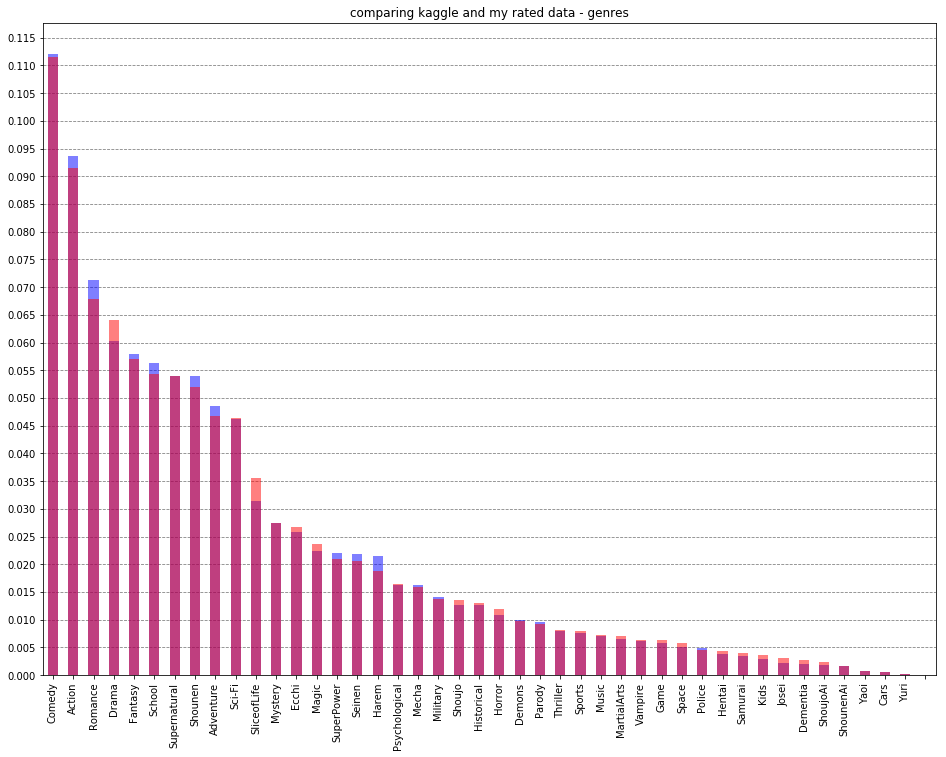

In [201]:
plt.figure(figsize=(16, 12))
plt.yticks(np.arange(0, 0.12, step=0.005))
norm_kaggle_genre_hist.plot(kind='bar', color='blue', alpha=0.5, title='comparing kaggle and my rated data - genres')
norm_filled_genres_hist.plot(kind='bar', color='red', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
plt.show()


In [207]:
kaggle_rats = rating_kaggle[rating_kaggle['rating'] != 0].groupby('user_id')['rating']
my_rats = animelists[filled_list_mask & (animelists['my_score'] != 0)].groupby('username')['my_score']


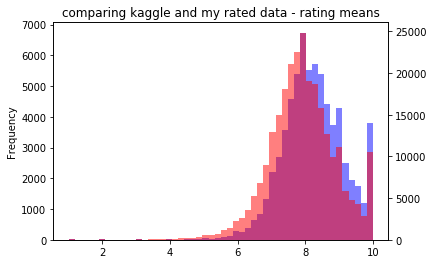

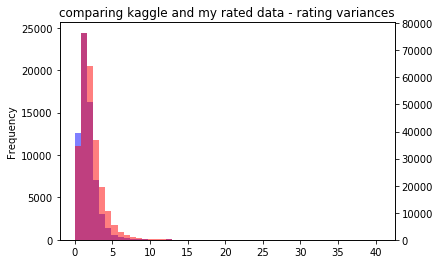

In [208]:
kaggle_rats.mean().plot(kind='hist', bins=50, color='blue', alpha=0.5, title='comparing kaggle and my rated data - rating means')
my_rats.mean().plot(kind='hist', bins=50, color='red', alpha=0.5, secondary_y=True)
plt.show()

kaggle_rats.var().plot(kind='hist', bins=50, color='blue', alpha=0.5, title='comparing kaggle and my rated data - rating variances')
my_rats.var().plot(kind='hist', bins=50, color='red', alpha=0.5, secondary_y=True)
plt.show()

In [209]:
kaggle_rats = rating_kaggle.groupby('user_id')['rating']
my_rats = animelists[filled_list_mask].groupby('username')['my_score']


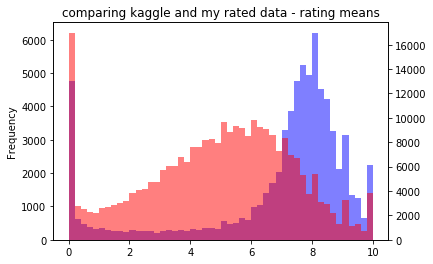

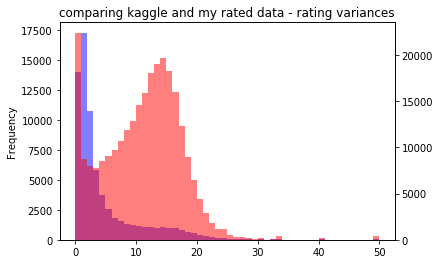

In [210]:
kaggle_rats.mean().plot(kind='hist', bins=50, color='blue', alpha=0.5, title='comparing kaggle and my rated data - rating means')
my_rats.mean().plot(kind='hist', bins=50, color='red', alpha=0.5, secondary_y=True)
plt.show()

kaggle_rats.var().plot(kind='hist', bins=50, color='blue', alpha=0.5, title='comparing kaggle and my rated data - rating variances')
my_rats.var().plot(kind='hist', bins=50, color='red', alpha=0.5, secondary_y=True)
plt.show()

In [182]:
rating_kaggle[rating_kaggle['rating'] != 0]

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


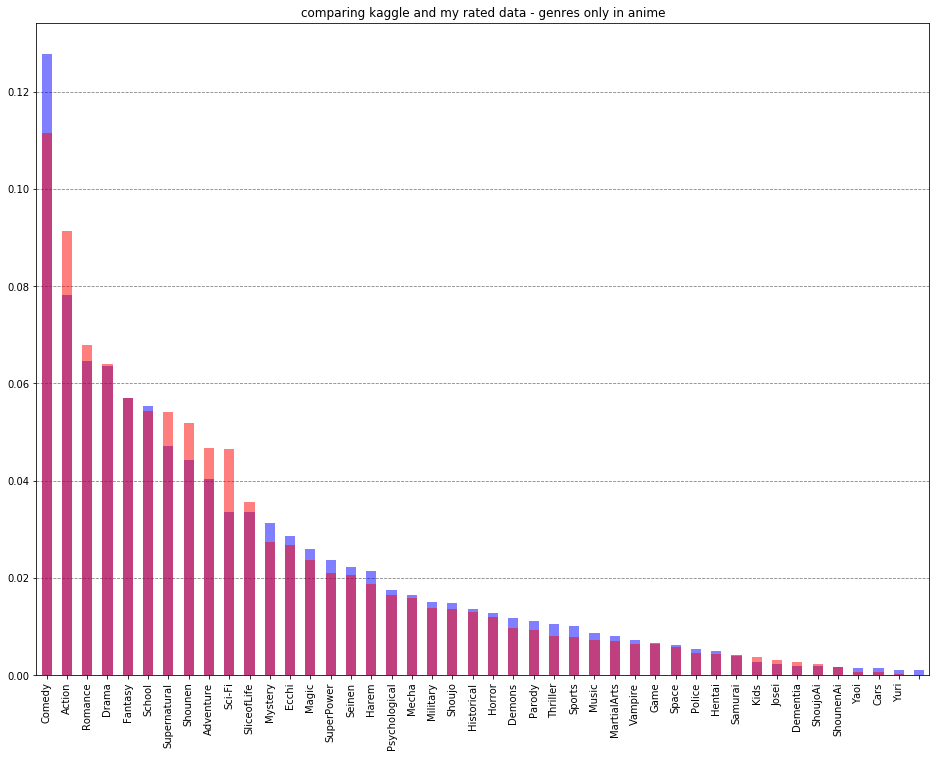

In [206]:
anime_kaggle['genre'].fillna('', inplace=True)
animes['genre'].fillna('', inplace=True)

kaggle_genre_anime = anime_kaggle['genre'].apply(lambda x: x.replace(' ', '').split(','))
kaggle_genre_anime_hist = pd.Series([y for x in kaggle_genre_anime for y in x]).value_counts()
norm_kaggle_genre_anime_hist = kaggle_genre_anime_hist / kaggle_genre_anime_hist.sum()

my_genre_anime = animes['genre'].apply(lambda x: x.replace(' ', '').split(','))
my_genre_anime_hist = pd.Series([y for x in my_genre_anime for y in x]).value_counts()
norm_my_genre_anime_hist = my_genre_anime_hist / my_genre_anime_hist.sum()

plt.figure(figsize=(16, 12))
norm_kaggle_genre_anime_hist.plot(kind='bar', color='blue', alpha=0.5, title='comparing kaggle and my rated data - genres only in anime')
norm_filled_genres_hist.plot(kind='bar', color='red', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='dashed')
plt.show()


In [3]:
116133 / 302675

0.3836887750887916